In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import defaultdict
from adjustText import adjust_text
%matplotlib inline

## Purpose of the analysis
All data is from https://insights.stackoverflow.com/survey
The purpose of the analysis of the data is to find out if it is still a good time to try getting a job in IT industry 
The data exploratory is to answer following questions:
During recent 5 years (2014~2018)

## Content

The analysis will include exploration into following questions:
1. Review of respondent number
2. Reveiw of question number
3. Is IT developer amount saturated in IT industry well-developed countries?
4. Is IT developer amount grow faster in other country?
5. Does gender ratio improve more balanced in IT industry?
6. What is the hottest occupation as a developer?
7. What is the hottest language or potential language for a developer?

In [2]:
#Load survey data
sr2014 = pd.read_csv('../datasets/2014Responses.csv')
sr2015 = pd.read_csv('../datasets/2015Responses.csv')
sr2016 = pd.read_csv('../datasets/2016Responses.csv')
sr2017 = pd.read_csv('../datasets/2017Responses.csv')
sr2018 = pd.read_csv('../datasets/2018Responses.csv')

E:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
E:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1. Get review of the size of respondent in each year survey

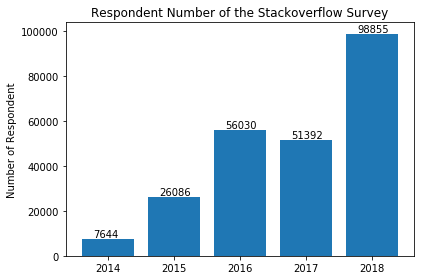

In [3]:
# Collect respondent number into dataframe
respondent = {}
for i in np.arange(2014, 2019, 1):
    respondent[i] = eval('sr'+str(i)).shape[0]
rpdt_df = pd.DataFrame.from_dict(respondent, orient = 'index', columns = ['num_respondent'])

# Plot the respondent barplot
x = rpdt_df.num_respondent.tolist()
plt.bar(range(len(x)), x)
plt.xticks(range(len(x)), rpdt_df.index)
for i in range(len(x)):
    plt.text(i-0.22, x[i]+800, x[i])
plt.ylabel('Number of Respondent')
plt.title('Respondent Number of the Stackoverflow Survey')
plt.tight_layout()
plt.savefig('./fig/respndent')

#### Answer to 1
- Based on the respondent size, it has a obvious leap in 2015, 2016 and 2018, the respondent amount almost doubled in these years
- In 2017, respondent amount slightly decline compared former year.
- The overal trend in recent 5 years has an amazing 89.64% CAGR(compound annual growth rate)

### 2. Get a review of the number of question in each year survey

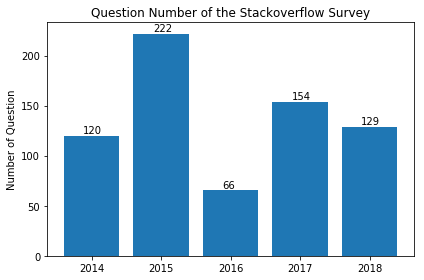

In [4]:
# Collect question number in dataframe
question = {}
for i in np.arange(2014, 2019, 1):
    question[i] = eval('sr'+str(i)).shape[1]
que_df = pd.DataFrame.from_dict(question, orient = 'index', columns = ['num_question'])

# Plot the question barplot
x = que_df.num_question.tolist()
plt.bar(range(len(x)), x)
plt.xticks(range(len(x)), que_df.index)
for i in range(len(x)):
    plt.text(i-0.12, x[i]+2, x[i])
plt.ylabel('Number of Question')
plt.title('Question Number of the Stackoverflow Survey')
plt.tight_layout()
plt.savefig('./fig/question')

#### Answer to 2
- The question number is mainly due to how the question being asked.
- In 2014 and 2015, questions regarding language used and to be used was asked by multiple yes/no questions about a single language.
- With the boom of techniques in mobile platform as well as cloud platform, more and more languages and technologies appear, so in 2015 survey the overall question number reach 222.
- After 2016, these language questions have been integrated into several multiple choices so the question number has been squeezed
- In 2017 and 2018, more question regarding developer workplace and career has been added, so the question number increase again

### 3. Is IT developer amount saturated in IT industry well-developed country?
The direct answer to this question in the survey is non-existing.
The logic to answer the question is to track the top 5 countires with most respondents to see the change of their growth rate and rank

Ahead of the analysis, get a review of the total number of country and terriority appeared in the survey

In [5]:
# Get the country distribution ratio
country2014 = pd.DataFrame(sr2014['What Country do you live in?'].dropna().value_counts()
                            / len(sr2014['What Country do you live in?'].dropna()))
country2014.columns = ['2014']

country2015 = pd.DataFrame(sr2015.Country.dropna()
                            .value_counts()/ len(sr2015.Country.dropna()))
country2015.columns = ['2015']

country2016 = pd.DataFrame(sr2016.country.dropna()
                            .value_counts()/ len(sr2016.country.dropna()))
country2016.columns = ['2016']

country2017 = pd.DataFrame(sr2017.Country.dropna()
                            .value_counts()/ len(sr2017.Country.dropna()))
country2017.columns = ['2017']

country2018 = pd.DataFrame(sr2018.Country.dropna()
                            .value_counts()/ len(sr2018.Country.dropna()))
country2018.columns = ['2018']

In [6]:
# Get a review of the data missing rate in country
miss2014 = (sr2014.shape[0]-len(sr2014['What Country do you live in?'].dropna()))/sr2014.shape[0]
miss2015 = (sr2015.shape[0]-len(sr2015.Country.dropna()))/sr2015.shape[0]
miss2016 = (sr2016.shape[0]-len(sr2016.country.dropna()))/sr2016.shape[0]
miss2017 = (sr2017.shape[0]-len(sr2017.Country.dropna()))/sr2017.shape[0]
miss2018 = (sr2018.shape[0]-len(sr2018.Country.dropna()))/sr2018.shape[0]
print(miss2014, miss2015, miss2016, miss2017, miss2018)

0.0 0.030936134324925247 0.008959485989648403 0.0 0.004167720398563553


##### Missing data in Countries and Territories
It is complicated to predict the country of the respondent based on his occupation, age and other personal information.
The missing rate in most years are negligible. So the solution to country column with missing data is to abandon these rows

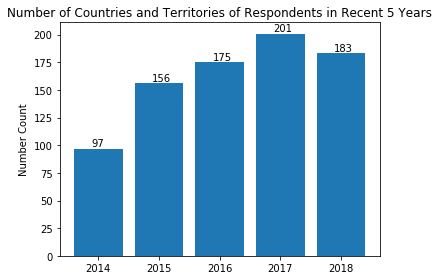

In [7]:
# Collect country and territory number into dataframe
country_size = {}
for i in np.arange(2014, 2019, 1):
    country_size[i] = eval('country'+str(i)).size
country_size_df = pd.DataFrame.from_dict(country_size, orient = 'index', columns = ['country_size'])

# Plot the number of country and territory barplot
x = country_size_df.country_size.tolist()
plt.bar(range(len(x)), x)
plt.xticks(range(len(x)), country_size_df.index)
for i in range(len(x)):
    plt.text(i-0.12, x[i]+2, x[i])
plt.ylabel('Number Count')
plt.title('Number of Countries and Territories of Respondents in Recent 5 Years')
plt.tight_layout()

#### Figure description
- The total number of country and territory sustainably increase during 2014 to 2016, but maintained at 170 to 200 in 2016 to 2018.

So a prediction to the top 5 country proportion will go down during 2014 to 2016

In [8]:
# Create some functions for further analysis
def get_prop(num1, num2):
    '''
    The function is to get the sum of coumtries ranked from number 1 to number 2 proportion
    
    Input
    num1: int, the start number of the country rank
    num2: int, the end number of the country rank
    
    Output
    temp_df —— pandas DataFrame with 1 column of the sum of proportion in 5 index from 2014 to 2018
    
    Eg. To get the the top 5, code 'get_prop(1, 5)'
    Eg. To get the 6th to 30th country proportion, code 'get_prop(6, 30)'
    '''
    temp_dict = {}
    for i in np.arange(2014, 2019):
        temp_dict[i] = eval('country'+str(i)+'.iloc['+str(num1-1)+':'+str(num2-1)+'].values.sum()')
    temp_df = pd.DataFrame.from_dict(temp_dict, orient = 'index', columns = ['col'])
    return temp_df

def plot_bar(df):
    '''
    The function to draw barplot of the dataframe using from get_prop function
    
    Input
    df: DataFrame created from get_prop function
    
    Eg. draw top 10 countries' total proportion in 2014 till 2018, code 'plot_bar(get_prop(1, 10))'   
    '''
    x = df.col.tolist()
    plt.bar(range(len(x)), x)
    plt.xticks(range(len(x)), df.index)
    plt.tight_layout()

In [9]:
top_5_prop = get_prop(1, 5)
top_5_prop

,col
2014,0.547488
2015,0.458286
2016,0.471618
2017,0.490154
2018,0.474488


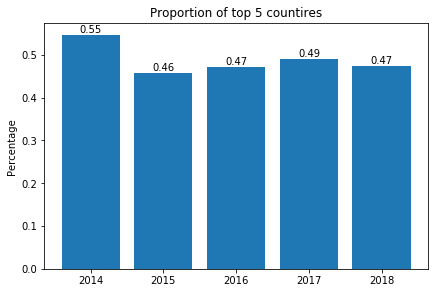

In [10]:
plot_bar(top_5_prop)
v = top_5_prop.col.tolist()
for i in range(5):
    plt.text(i-0.15, v[i]+0.005, '{:.2f}'.format(v[i]))
plt.ylabel('Percentage')
plt.title('Proportion of top 5 countires')
plt.savefig('./fig/prop_5')

#### Figure description
- As the prediction beforehand, proportion has a decrease in 2015 as more countries and territories appear in the survey.
- The proportion keep stable during 2016 to 2018 around 50% of the total respondent.

Then study the rank of the 5 top countries

E:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:6359: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  verify_integrity=True)


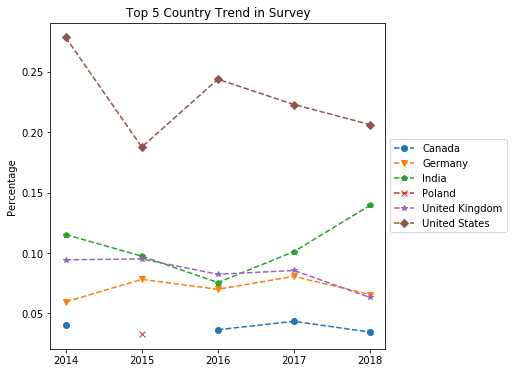

In [11]:
# Collect top 5 countries in each year into dataframe
top_5 = country2014.iloc[:5].join([country2015.iloc[:5], country2016.iloc[:5], 
                                     country2017.iloc[:5], country2018.iloc[:5]], how = 'outer')
top_5 = top_5.T

# Plot the line chart to show the trend
plt.figure(figsize = [6, 6])
marker = ['o', 'v', 'p', 'x', '*', 'D']
for i in range(len(top_5.columns)):
    plt.plot(range(5), top_5.iloc[:, i], ls = '--', marker = marker[i])
    plt.xticks(range(5), top_5.index)
plt.ylabel('Percentage')
plt.title('Top 5 Country Trend in Survey')
plt.legend(loc = 6, bbox_to_anchor = (1, 0.5))
plt.savefig('./fig/top_5')

#### Figure description
- The top 4 countries keep the same in the recent 5 years
- No. 5 country has a replacement in 2015. Since most countries after top 5 has a very slight difference in ratio, it is understandable.
- The rank of the top 5 country looks very stable

#### Answer to 3
- The proportion and rank figures of top 5 countries showed it is very stable for these IT industry developed countries
- Considering the increase of the respondent number as well as country and territory number, it shows the need for IT developer is still vigorous in these countries
- The reason for the phenomenon can be credited that the global economy rise constantly in these years, mobile devices and cloud platforms universalness, newly-developing technology (AI, VR, AR) springing up.

### 4. Is IT developer amount grow faster in other country?
The method used to study the question is similar to chapter 3. The country or terroritory which ranked from 6th to 30th will be tracked to see how their percentage change in recent 5 years

The rank track will not be included in this chapter. For most countries ranked between 6th to 30th won't have too obvious difference, the rank will changed rapidly in each year. Even the difference between 10th and 50th is small.

In [12]:
top_6_30_prop = get_prop(6, 30)
top_6_30_prop

,col
2014,0.284406
2015,0.362119
2016,0.354974
2017,0.294657
2018,0.320287


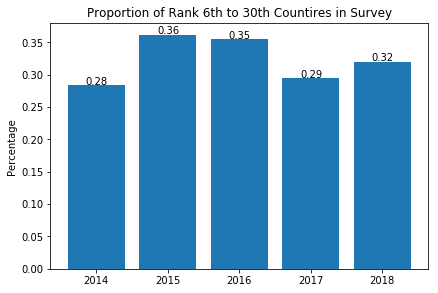

In [13]:
plot_bar(top_6_30_prop)
v = top_6_30_prop.col.tolist()
for i in range(5):
    plt.text(i-0.15, v[i]+0.001, '{:.2f}'.format(v[i]))
plt.ylabel('Percentage')
plt.title('Proportion of Rank 6th to 30th Countires in Survey')
plt.savefig('./fig/prop_6_30')

#### Figure description
- The proportion of rank 6th to 30th increase almost the same extent as the top 5 decrease in 2016
- From 2016 to 2018, the proportion of the 6th to 30th countries is negatively correlated to the total country and territory number
- From 2016 to 2018, the proportion of the 6th to 30th countries is around 30%
- Related to top 5 proportion, respondent from the top 30 countries occupy 80% of the total

#### Answer to 4
- The study does not show the other country increase faster than the top 5 country (based on the proportion rate comparision)
- Since the respondent has a CAGR of 89%, so it can be inferred that all countries share this growth rate
- A shallow conclusion to chapter 3 and 4 is whatever country do you come from, IT developer is still demanded badly in most countries 

### 5. Does gender ratio improve more balanced in IT industry?
The gender ratio will be compared within 5 year survey data to see if IT industry has improvement to accept more female developers

In [14]:
# Get the gender ratio
gender2014 = pd.DataFrame(sr2014['What is your gender?'].dropna().value_counts()
                          / len(sr2014['What is your gender?'].dropna()))
gender2014.columns = ['2014']

gender2015 = pd.DataFrame(sr2015.Gender.dropna().value_counts() / len(sr2015.Gender.dropna()))
gender2015.columns = ['2015']

gender2016 = pd.DataFrame(sr2016.gender.dropna().value_counts() / len(sr2016.gender.dropna()))
gender2016.columns = ['2016']

gender2017 = pd.DataFrame(sr2017.Gender.dropna().value_counts() / len(sr2017.Gender.dropna()))
gender2017.columns = ['2017']

gender2018 = pd.DataFrame(sr2018.Gender.dropna() .value_counts() / len(sr2018.Gender.dropna()))
gender2018.columns = ['2018']

In [69]:
# Get a review of the data missing rate in gender ratio
miss_gender2014 = (len(sr2014['What is your gender?']) - len(sr2014['What is your gender?'].dropna()))/len(sr2014['What is your gender?'])
miss_gender2015 = (len(sr2015.Gender) - len(sr2015.Gender.dropna()))/len(sr2015.Gender)
miss_gender2016 = (len(sr2016.gender) - len(sr2016.gender.dropna()))/len(sr2016.gender)
miss_gender2017 = (len(sr2017.Gender) - len(sr2017.Gender.dropna()))/len(sr2017.Gender)
miss_gender2018 = (len(sr2018.Gender) - len(sr2018.Gender.dropna()))/len(sr2018.Gender)
print(miss_gender2014, miss_gender2015, miss_gender2016, miss_gender2017, miss_gender2018)

0.03885400313971742 0.013110480717626313 0.00792432625379261 0.3180456102117061 0.34784280006069496


The missing data rate in gender is very little in 2014 to 2016. In 2017 and 2018, it sharply rises to over 30%.

The major difference between survey before 2017 and after 2017 is the order of the gender question given.

Before 2017, the gender question appears in the first 5 questions.
After 2017, the gender question is given in the last few questions. The reasonable explanation to it is after quite a lot questions answered, respondent will prefer to deny to give response to personal question even though there is option to not disclosure the gender.

All missing data will be dropped since the study is to have a outline of the gender ratio proportion. Any speculation to missing value will manually impact the result.

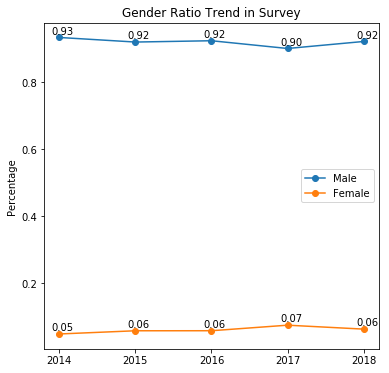

In [16]:
# Merge data into dataframe
gender = gender2014.join([gender2015, gender2016, gender2017, gender2018], how = 'inner', sort = False)
gender = gender.T

# Plot the gender ratio line chart
plt.figure(figsize = [6, 6])
marker = ['o', 'v']
for i in range(2):
    plt.plot(range(5), gender.iloc[:, i], marker = 'o')
    plt.xticks(range(5), gender.index)
    for j in range(5):
        plt.text(j-0.1, gender.iloc[j,i]+0.01, '{:0.2f}'.format(gender.iloc[j,i]))
plt.ylabel('Percentage')
plt.title('Gender Ratio Trend in Survey')
plt.legend(loc = 0)
plt.savefig('./fig/gender')

#### Answer to 5
- The gender ratio is almost invariable in recent 5 years
- It's not a good recommendation for female to join IT industry since behind the data there must be some bias to female developer
- To be optimistic, since the female developer ratio in IT industry is really low, it leaves a huge space in future to be improved

### 6. What is the hottest occupation as a developer?

In each year survey, the question and options under occupation always have some slight difference.

To get the general trend of the different developer field, only web developer, mobile developer and data analyst (or scientist) will be compared at first.

- Front-end, Back-end, Full-stack developer will be combined into web developer.
- IOS, Android and Windows Phone developer will be combined into mobile developer.
- Data related job, such as business analyst, machine learning specialist will be combined into data analyst or scientist.

So the final result will only include the ratio of web, developer, mobile developer, data analyst or scientis, student and others.

In [17]:
# Since the difference in each year survey, the way to retrive data will differ
sr2014_occ = sr2014['Which of the following best describes your occupation?'].dropna().replace(['Full-Stack Web Developer', 
                                                 'Back-End Web Developer', 'Front-End Web Developer'], 'Web developer')
sr2014_occ = sr2014_occ.replace(['Mobile Application Developer'], 'Mobile developer')
for i in range(len(sr2014_occ)):
    if sr2014_occ.iloc[i] not in ['Web developer', 'Mobile developer', 'Student']:
        sr2014_occ.iloc[i] = 'Other'

occ2014 = pd.DataFrame(sr2014_occ.value_counts().values, index = sr2014_occ.value_counts().index, columns = ['col'])
occ2014['2014ratio'] = occ2014.col / len(sr2014_occ)
occ2014.drop('col', axis = 1, inplace = True)

In [18]:
sr2015_occ = sr2015.Occupation.dropna().replace(['Full-stack web developer', 
                                                 'Back-end web developer', 'Front-end web developer'], 'Web developer')
sr2015_occ = sr2015_occ.replace(['Mobile developer - iOS', 'Mobile developer - Android',
                                'Mobile developer - Windows Phone'], 'Mobile developer')
sr2015_occ = sr2015_occ.replace(['Developer with a statistics or mathematics background',
                                'Analyst', 'Data scientist', 'Business intelligence or data warehousing expert', 
                                 'Machine learning developer'], 'Data analyst or scientist')
for i in range(len(sr2015_occ)):
    if sr2015_occ.iloc[i] not in ['Web developer', 'Mobile developer', 'Data analyst or scientist', 'Student']:
        sr2015_occ.iloc[i] = 'Other'

occ2015 = pd.DataFrame(sr2015_occ.value_counts().values, index = sr2015_occ.value_counts().index, columns = ['col'])
occ2015['2015ratio'] = occ2015.col / len(sr2015_occ)
occ2015.drop('col', axis = 1, inplace = True)

In [19]:
sr2016_occ = sr2016.occupation.dropna().replace(['Full-stack web developer', 
                                                 'Back-end web developer', 'Front-end web developer'], 'Web developer')
sr2016_occ = sr2016_occ.replace(['Mobile developer - iOS', 'Mobile developer - Android',
                                'Mobile developer - Windows Phone'], 'Mobile developer')
sr2016_occ = sr2016_occ.replace(['Developer with a statistics or mathematics background',
                                'Analyst', 'Data scientist', 'Machine learning specialist',
                                'Business intelligence or data warehousing expert', 
                                 'Machine learning developer'], 'Data analyst or scientist')
for i in range(len(sr2016_occ)):
    if sr2016_occ.iloc[i] not in ['Web developer', 'Mobile developer', 'Data analyst or scientist', 'Student']:
        sr2016_occ.iloc[i] = 'Other'

occ2016 = pd.DataFrame(sr2016_occ.value_counts().values, index = sr2016_occ.value_counts().index, columns = ['col'])
occ2016['2016ratio'] = occ2016.col / len(sr2016_occ)
occ2016.drop('col', axis = 1, inplace = True)

In 2017 Survey, there is a change compared to 2014~2016, student type is included in another column 'Professional'

But some respondent who pick 'Studeht' in 'Professional' also take multiple develop types in 'DeveloperType'

As we want to collect data reflecting status of the job market, we use 'Student' to present the developer type as it was in 2014~2016

In [20]:
for i in range(len(sr2017['DeveloperType'])):
    if sr2017.loc[i, 'Professional'] == 'Student':
        sr2017.loc[i, 'DeveloperType'] = 'Student'
    else:
        continue

dev_count2017 = defaultdict(int)
for i in sr2017.DeveloperType.dropna():
    typ = i.split(sep='; ')
    if 'Student' in typ:
        typ = ['Student'] #The job interest for a student is not contained in this count
    if 'Developer with a statistics or mathematics background' in typ or 'Data scientist' in typ or 'Machine learning specialist' in typ:
        try:
            typ.remove('Developer with a statistics or mathematics background')
        except:
            pass
        try:
            typ.remove('Data scientist')
        except:
            pass
        try:
            typ.remove('Machine learning specialist')
        except:
            pass
        typ.append('Data analyst or scientist')
        
    del_num = []
    for j in range(len(typ)):
        if typ[j] not in ['Data analyst or scientist', 'Web developer', 'Mobile developer', 'Student', 'Other']:
            del_num.append(j)
    for k in del_num:
        typ[k] = 'Other'
    for l in list(set(typ)):
        dev_count2017[l] += 1
occ2017 = pd.DataFrame.from_dict(dev_count2017, orient = 'index', columns = ['col'])
occ2017.sort_values(by = ['col'], ascending = False,  inplace = True)
occ2017['2017ratio'] = occ2017.col / len(sr2017.DeveloperType.dropna())
occ2017.drop('col', axis = 1, inplace = True)

In [21]:
dev_count2018 = defaultdict(int)
for i in sr2018.DevType.dropna():
    typ = i.split(sep=';')
    if 'Full-stack developer' in typ or 'Back-end developer' in typ or 'Front-end developer' in typ:
        try:
            typ.remove('Back-end developer')
        except:
            pass
        try:
            typ.remove('Front-end developer')
        except:
            pass
        try:
            typ.remove('Full-stack developer')
        except:
            pass
        typ.append('Web developer')
    if 'Data or business analyst' in typ or 'Data scientist or machine learning specialist' in typ:
        try:
            typ.remove('Data or business analyst')
        except:
            pass
        try:
            typ.remove('Data scientist or machine learning specialist')
        except:
            pass
        typ.append('Data analyst or scientist')
    if 'Student' in typ:
        typ = ['Student'] #The job interest for a student is not contained in this count
        
    del_num = []
    for j in range(len(typ)):
        if typ[j] not in ['Data analyst or scientist', 'Web developer', 'Mobile developer', 'Student', 'Other']:
            del_num.append(j)
    for k in del_num:
        typ[k] = 'Other'
    for l in list(set(typ)):
        dev_count2018[l] += 1
        
occ2018 = pd.DataFrame.from_dict(dev_count2018, orient = 'index', columns = ['col'])
occ2018.sort_values(by = ['col'], ascending = False,  inplace = True)
occ2018['2018ratio'] = occ2018.col / len(sr2018.DevType.dropna())
occ2018.drop('col', axis = 1, inplace = True)

In [44]:
# Get a review of the data missing rate in gender ratio
miss_occ_2014 = (len(sr2014['Which of the following best describes your occupation?']) - 
                 len(sr2014['Which of the following best describes your occupation?'].
                     dropna()))/ len(sr2014['Which of the following best describes your occupation?'])
miss_occ_2015 = (len(sr2015.Occupation) - len(sr2015.Occupation.
                                              dropna())) / len(sr2015.Occupation)
miss_occ_2016 = (len(sr2016.occupation) - len(sr2016.occupation.
                                              dropna())) / len(sr2016.occupation)
miss_occ_2017 = (len(sr2017.DeveloperType) - len(sr2017.DeveloperType.
                                                 dropna())) / len(sr2017.DeveloperType)
miss_occ_2018 = (len(sr2018.DevType) - len(sr2018.DevType.dropna())) / len(sr2018.DevType)
print(miss_occ_2014, miss_occ_2015, miss_occ_2016, miss_occ_2017, miss_occ_2018)

0.03885400313971742 0.2006823583531396 0.11620560414063895 0.13708359277708593 0.06835263770168429


The missing rate in 2015, 2016 and 2017 is above 10%. Especially in 2015, it reaches 20%.
A deeper study into 2015 missing occupation value will be done. 

In [46]:
# Extract respondent dataframe with missing value in occupation
sr2015_noocc = sr2015[sr2015.Occupation.isnull()]

In [50]:
# To check the top 5 country list of respondent with missing value in occupation
sr2015_noocc.Country.value_counts()[:5]/len(sr2015_noocc.Country)

United States     0.147278
India             0.108883
United Kingdom    0.086915
Germany           0.071251
Poland            0.035148
Name: Country, dtype: float64

In [54]:
# Check the top 5 countries ratio of respondent with missing value in occupation
sr2015_noocc.Country.value_counts()[:5].sum()/len(sr2015_noocc.Country)

0.44947468958930276

In [52]:
# Check the gender ratio of respondent with missing value in occupation
sr2015_noocc.Gender.value_counts()/len(sr2015_noocc.Gender)

Male                      0.848329
Female                    0.071060
Prefer not to disclose    0.028271
Other                     0.009360
Name: Gender, dtype: float64

There is no obvious feature in the missing value group different from normal group. Since it is not very necessary to speculate occupation, the goal of the study is to understand the percentage of each occupation in survey. So these missing value will be dropped directly

E:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:6359: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  verify_integrity=True)


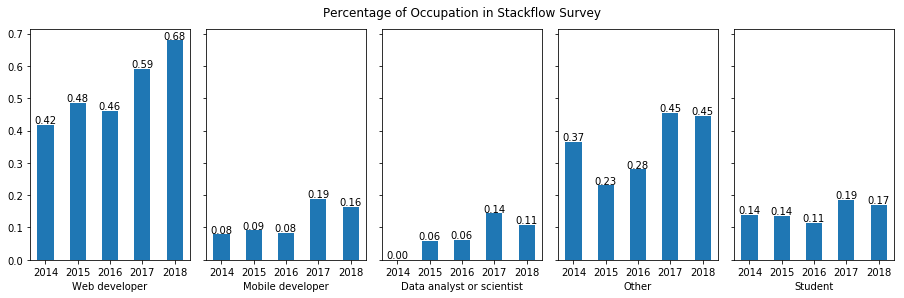

In [22]:
# Merge occupation data into dataframe

occ_compare = occ2014.join([occ2015, occ2016, occ2017, occ2018], how = 'outer', sort = False)
occ_compare.columns = ['2014', '2015', '2016', '2017', '2018']
occ_compare.fillna(0, inplace = True)
occ_compare = occ_compare.T
occ_compare = occ_compare[['Web developer', 'Mobile developer', 'Data analyst or scientist', 'Other', 'Student']]

# Plot the line chart of each occupation 
col = occ_compare.columns
x = occ_compare.index

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = [15, 4], sharey = True)
y = [ax1, ax2, ax3, ax4, ax5]

for i in range(5):
    y[i].bar(range(5), occ_compare.iloc[:, i], width = 0.5)
    y[i].set_xticks(range(5))
    y[i].set_xticklabels(x)
    y[i].set_xlabel(col[i])
    for j in range(5):
        y[i].text(j-0.35, occ_compare.iloc[j, i]+0.005, '{:0.2f}'.format(occ_compare.iloc[j, i]))
fig.suptitle('Percentage of Occupation in Stackflow Survey')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace = 0.1)
plt.savefig('./fig/PercentOcc')

#### Figure description description
- All data will be higher in 2017 and 2018 since they allow multiple choices in occupation
- The web developer percentage is incredibly increased since 42% in 2014 to almost 70% in 2018
- Moible developer percentage has been doubled in from 2014 to 2018
- Data related job first start in 2015 survey and has been doubled from 2014 to 2018
- Other occupation (most typical IT developer occupation) was influenced by single option survey in 2015 and 2016, which means they are no longer the main job duties for these developer

#### Answer to 6
- If any people want to start it IT career, the best entrance is to become a web developer
- Mobile developer and Data analyst or scientist are also potential jobs to be considered
- Other typical job we see the trend that they will exist but with a rising speed stagnation 

### 7. What is the hottest language or potential language for a developer?

There is two related questions in each year survey.

One is what's the most used language and the other is what's the language the respondent want to learn/use

Both questions will be studied. For the first question, it will be useful for people who is not a developer but want to become, to know what kind of language is most useful in today's work place. The other question is more useful to people who is already a developer or someone who has the capability to learn more.

Only 2016 to 2018 data will be included. The reason has been mentioned at the start of the project. In 2014 and 2015 survey, the question of the language has been split into muliple yes or no question about a single language. So to count the usage of language, all related columns needed analysis. Their results would need to be combined. Beside that, the technology is changing so rapidly in IT industry. So there is not very necessary to study the language trend 4 or 5 years ago.

Since there are too many languages, we will only look into each year's top 10 popular languages for key point prominence

#### 7.1 Language Used Trend

In [23]:
worked_lang_2017 = defaultdict(int) 
for i in sr2017['HaveWorkedLanguage'].dropna():
    lang = i.split('; ')
    for j in lang:
        worked_lang_2017[j] += 1

worked_lang_2017
w_lan_2017 = pd.DataFrame.from_dict(worked_lang_2017, orient = 'index', columns = ['col'])
w_lan_2017.sort_values(by = ['col'], ascending = False,  inplace = True)
w_lan_2017['2017'] = w_lan_2017.col / len(sr2017['HaveWorkedLanguage'].dropna())
w_lan_2017.drop('col', axis = 1, inplace = True)

In [24]:
# The language data in 2016 survey is confusing for it contains multiple options include platform, operation system
# So the 2016 language roaster is filtered by 2017 to keep only language option within it
worked_lang_2016 = defaultdict(int) 
for i in sr2016.tech_do.dropna():
    lang = i.split('; ')
    for j in lang:
        worked_lang_2016[j] += 1

worked_lang_2016
w_lan_2016 = pd.DataFrame.from_dict(worked_lang_2016, orient = 'index', columns = ['col'])
w_lan_2016.sort_values(by = ['col'], ascending = False,  inplace = True)
w_lan_2016['2016'] = w_lan_2016.col / len(sr2016.tech_do.dropna())
w_lan_2016.drop('col', axis = 1, inplace = True)

for i in w_lan_2016.index:
    if i not in w_lan_2017.index:
        w_lan_2016.drop(i, inplace=True)

In [25]:
worked_lang_2018 = defaultdict(int) 
for i in sr2018['LanguageWorkedWith'].dropna():
    lang = i.split(';')
    for j in lang:
        worked_lang_2018[j] += 1

worked_lang_2018
w_lan_2018 = pd.DataFrame.from_dict(worked_lang_2018, orient = 'index', columns = ['col'])
w_lan_2018.sort_values(by = ['col'], ascending = False,  inplace = True)
w_lan_2018['2018'] = w_lan_2018.col / len(sr2018['LanguageWorkedWith'].dropna())
w_lan_2018.drop('col', axis = 1, inplace = True)

In [57]:
# Get a review of the data missing rate in language used
miss_lan_2016 = (len(sr2016.tech_do) - len(sr2016.tech_do.dropna())) / len(sr2016.tech_do)
miss_lan_2017 = (len(sr2017['HaveWorkedLanguage']) - len(sr2017['HaveWorkedLanguage'].dropna())) / len(sr2017['HaveWorkedLanguage'])
miss_lan_2018 = (len(sr2018['LanguageWorkedWith']) - len(sr2018['LanguageWorkedWith'].dropna())) / len(sr2018['LanguageWorkedWith'])
print(miss_lan_2016, miss_lan_2017, miss_lan_2018)

0.12502230947706586 0.2873404420921544 0.20758686965757928


The missing rate is all above 10%. Especially in 2017, it reaches 28%.
A deeper study into 2017 missing language value will be done. 

In [59]:
# Extract respondent dataframe with missing value in occupation
sr2017_nolan = sr2017[sr2017['HaveWorkedLanguage'].isnull()]

In [60]:
# To check the top 5 country list of respondent with missing value in occupation
sr2017_nolan.Country.value_counts()[:5]/len(sr2017_nolan.Country)

United States     0.172615
India             0.157920
Germany           0.071917
United Kingdom    0.068396
Canada            0.036974
Name: Country, dtype: float64

In [61]:
# Check the top 5 countries ratio of respondent with missing value in occupation
sr2017_nolan.Country.value_counts()[:5].sum()/len(sr2017_nolan.Country)

0.5078214938714701

In [62]:
# Check the gender ratio of respondent with missing value in occupation
sr2017_nolan.Gender.value_counts()/len(sr2017_nolan.Gender)

Male                                        0.041376
Female                                      0.004943
Other                                       0.001016
Gender non-conforming                       0.000880
Transgender                                 0.000203
Female; Gender non-conforming               0.000135
Male; Transgender; Gender non-conforming    0.000068
Female; Transgender                         0.000068
Transgender; Gender non-conforming          0.000068
Name: Gender, dtype: float64



The respondent who leave missing value in language almost do the same in gender question
As we conclude what we will do to these data in gender, we will also drop them in language used study.

E:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:6359: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  verify_integrity=True)


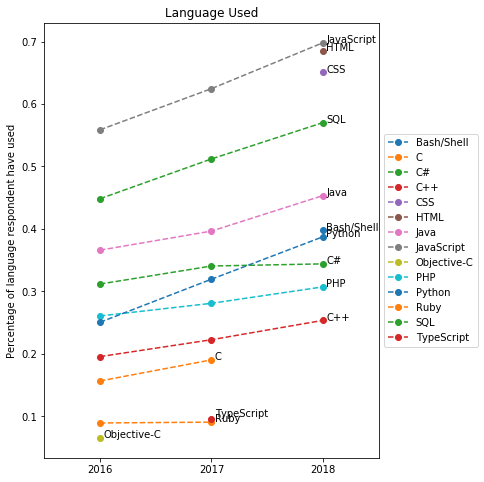

In [70]:
# Merge language used data into dataframe
w_lan = w_lan_2016[:10].join([w_lan_2017[:10], w_lan_2018[:10]], how = 'outer')
w_lan = w_lan.T

# Plot line chart
plt.figure(figsize = [6, 8])
for i in w_lan.columns:
    plt.plot(range(3), w_lan[i], ls = '--', marker = 'o')
    plt.xticks(range(3), w_lan.index)
    texts = []
    if w_lan.loc['2018',i] >0:
        texts.append(plt.text(2.03, w_lan.loc['2018',i], '{lan}'.format(lan = i)))
    elif w_lan.loc['2017',i] >0:
        texts.append(plt.text(1.03, w_lan.loc['2017',i], '{lan}'.format(lan = i)))
    else:
        texts.append(plt.text(0.03, w_lan.loc['2016',i], '{lan}'.format(lan = i)))
adjust_text(texts)
plt.margins(x = 0.25)
plt.ylabel('Percentage of language respondent have used')
plt.title('Language Used')
plt.legend(loc = 6, bbox_to_anchor = (1, 0.5))
plt.savefig('./fig/lan_used')

#### Figure description
- The most popular language in recent 3 years are deeply related to web developing skills: JavaScript, HTML, CSS
- For the rising of machine learning, data analysis, python has a strong lift compared against other languages
- Basically lots of the top 10 language used percentage increase every year, which means the developer not only use one or two, but have to use multiple languages as tools to imporve their work performance or efficiency
- The suggestion to people who want to become a developer, it is useful to learn language based on this figure. But for a longer career, never stop to learn more tools to improve cause most other developers in this industry do so. 

#### 7.2 Language Desired Trend

The method to deal with missing value in language want to use will be the same as used language. The missing value will be dropped.

In [29]:
desire_lang_2017 = defaultdict(int) 
for i in sr2017['WantWorkLanguage'].dropna():
    lang = i.split('; ')
    for j in lang:
        desire_lang_2017[j] += 1

d_lan_2017 = pd.DataFrame.from_dict(desire_lang_2017, orient = 'index', columns = ['col'])
d_lan_2017.sort_values(by = ['col'], ascending = False,  inplace = True)
d_lan_2017['2017'] = d_lan_2017.col / len(sr2017['WantWorkLanguage'].dropna())
d_lan_2017.drop('col', axis = 1, inplace = True)

In [71]:
desire_lang_2018 = defaultdict(int) 
for i in sr2018['LanguageDesireNextYear'].dropna():
    lang = i.split(';')
    for j in lang:
        desire_lang_2018[j] += 1


d_lan_2018 = pd.DataFrame.from_dict(desire_lang_2018, orient = 'index', columns = ['col'])
d_lan_2018.sort_values(by = ['col'], ascending = False,  inplace = True)
d_lan_2018['2018'] = d_lan_2018.col / len(sr2018['LanguageDesireNextYear'].dropna())
d_lan_2018.drop('col', axis = 1, inplace = True)

In [72]:
desire_lang_2016 = defaultdict(int) 
for i in sr2016.tech_want.dropna():
    lang = i.split('; ')
    for j in lang:
        desire_lang_2016[j] += 1

d_lan_2016 = pd.DataFrame.from_dict(desire_lang_2016, orient = 'index', columns = ['col'])
d_lan_2016.sort_values(by = ['col'], ascending = False,  inplace = True)
d_lan_2016['2016'] = d_lan_2016.col / len(sr2016.tech_want.dropna())
d_lan_2016.drop('col', axis = 1, inplace = True)

for i in d_lan_2016.index:
    if i not in d_lan_2017.index:
        d_lan_2016.drop(i, inplace=True)

E:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:6359: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  verify_integrity=True)


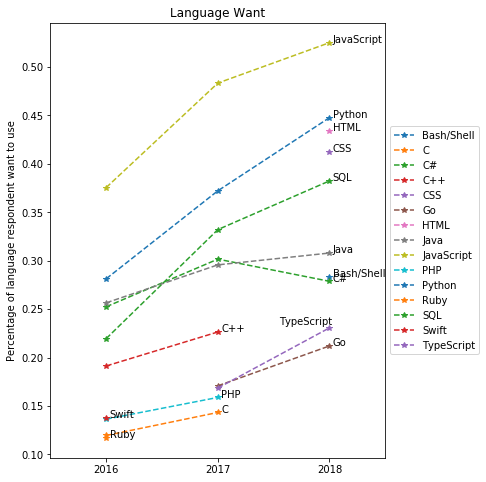

In [74]:
# Merge above data into dataframe
d_lan = d_lan_2016[:10].join([d_lan_2017[:10], d_lan_2018[:10]], how = 'outer')
d_lan = d_lan.T

# Plot line chart
plt.figure(figsize = [6, 8])
for i in d_lan.columns:
    plt.plot(range(3), d_lan[i], ls = '--', marker = '*')
    plt.xticks(range(3), d_lan.index)
    texts = []
    if d_lan.loc['2018',i] >0:
        texts.append(plt.text(2.03, d_lan.loc['2018',i], '{lan}'.format(lan = i)))
    elif d_lan.loc['2017',i] >0:
        texts.append(plt.text(1.03, d_lan.loc['2017',i], '{lan}'.format(lan = i)))
    else:
        texts.append(plt.text(0.03, d_lan.loc['2016',i], '{lan}'.format(lan = i)))
adjust_text(texts)
plt.margins(x = 0.25)
plt.ylabel('Percentage of language respondent want to use')
plt.title('Language Want')
plt.legend(loc = 6, bbox_to_anchor = (1, 0.5))
plt.savefig('./fig/lan_want')

#### Figure description
- JavaScript, Python, HTML, CSS and SQL are the most desired language
- New language such as TypeScript and Go also earns more and more fans and present fast-rising trend

#### Answer to 7
- For people who are interested to become a web developer, it is suggested to get proficiency im JavaScript, HTML, CSS or even PHP
- For people who are interested to become a data analyst or scientis, it is suggested to put Python, SQL into skill
- For people who are interested to become a mobile developer, maybe Java is still a good choice, but there is more recommended language based on which platform will you work on which is not listed in this popular language list
- For people who are not interested in above direction, this article is not a dictionary for all developers, please follow more professional resource.

### Summary 

In this study, I throw some valuable questions about becoming a developer. Then I try to answer them with practical data with visualization

A brief conclution will be summarized as following:
1. In the global scope, the demand for IT developers are strong and no signs of slow down.
2. The employer market for female is not kind, the male gender ratio in developers is dominant. The gap between male and female ratio seems no shrink.
3. The web developer is the most hotest occupation in this industry. Mobile and Data related jobs are rising.
4. JavaScript, HTML, CSS, SQL, Java and Python are most hoteset languages being used. If you want to look further, pay attention to TypeScript and Go. Be attention that the language you choose should match your occupation direction. After all, master as many as languages as you can is always the best scenario. 